<a href="https://colab.research.google.com/github/ChoiSenn/E.B.S/blob/main/data_analysis/exercise/ch10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 분석과 머신러닝**
## 2022-06-01  다양한 머신러닝 기법 - SVM, 결정 트리, 차원 축소

<br><br>

---

<br><br>

## 1. 서포트 벡터 머신

<br><br>

서포트 벡터 머신은 흔히 SVM이라 부르는데, 딥러닝이 떠오르기 전까지 머신러닝 분야에서 가장 인기가 높은 데이터 분류 방법이었다.<br>

색이 다른 두 그룹의 데이터가 있을 경우, 실선의 경계를 만들어 데이터를 분리하는 분류 방법이다.<br>

이때 더 좋은 분리면은 현재의 데이터를 잘 분리하면서도, 새로운 데이터가 들어왔을 때에도 분리를 잘 할 수 있는 평면일 것이다. 따라서 평면을 법선 벡터 방향으로 움직였을 때 데이터에 닿는 지점이 멀수록 좋은 평면이다.

<br>

SVM은 두 데이터 그룹을 나누는 평면 중에서 폭이 가장 넓은 것을 찾는 방법이다. 이 분리 평면은 결정 경계라고 한다. 결정 경계면은 2차원에서는 직선이지만 그 이상의 차원에서는 가시화할 수 없는 평면으로, 초평면이라 부른다. 그리고 결정 경계와 서포트 벡터 사이의 거리를 마진이라고 부른다. 어떠한 데이터도 들어오지 못하는, 엄격한 마진을 하드 마진이라고 한다. 일부 데이터가 마진 내에 들어오게 허용하며 분리 평면을 찾는 경우를 소프트 마진이라고 한다.

<br>

하드 마진이든 소프트 마진이든 마진을 최대로 넓게 만드려고 하기 때문에 마진의 양쪽 경계에는 서로 다른 그룹에 속하는 데이터들이 하나씩 닿아있다. 이와 같이 마진 결정에 영향을 미치는 데이터들이 서포트 벡터이다.<br>

하드 마진 사용 시에는 분류가 안 될 수도 있고, 잡음에 민감할 수 밖에 없으므로 소프트 마진 사용이 바람직하다. 잡음에 민감하다는 것은 데이터에 과적합 된다는 의미이다.<br>
소프트 마진을 사용할 때에는 마진 내에 들어갈 수 있는 데이터의 수를 제어한다. 이 값을 제어하는 변수를 슬랙 변수라고 한다.

<br><br>

---

<br><br>

## 2. 서포트 벡터 머신의 구현 방법

<br><br>

서포트 벡터의 최적 결정 경계는 마진을 최대화하는 경계이다.<br>

데이터 그룹 A와 B가 학습용으로 주어졌을 때 학습 알고리즘은 각 그룹의 중심점을 구한 후, 그 가운데를 지나는 최적의 결정 경계면을 구하여, 두 데이터 그룹을 나누는 방법을 학습한다.<br>

직선으로 나눌 수 있다면 선형 분류 모델을, 직선으로 나눌 수 없는 경우 비선형 분류 모델을 사용한다.

<br>

두 평면의 방정식이 있을 경우, 계수 a, b의 제곱의 합이 작아지면 분모가 작아져서 마진은 커진다. 마진이 클수록 좋은 SVM 알고리즘이므로 분모가 작아지도록 학습시킨다.

<br><br>

---

<br><br>

## 3. 분류 오류와 마진 오류 최소화 사이의 트레이드오프

<br><br>

두 데이터의 마진이 매우 큰 결정 경계일 경우, 새로운 데이터에 대해 좋은 분류 성능을 보여줄 수 있을 것이지만, 분류 오류를 포함할 수 있다.<br>

반면 분류 오류가 전혀 없는 결정 경계의 경우, 마진이 너무 작아 새로운 데이터가 들어올 경우 분류를 제대로 할 수 없을 수도 있다.<br>

SVM은 분류 오류와 마진 오류를 모두 줄이는 방향으로 학습을 진행하되, 두 오류 중 어느 오류를 더 줄이는 방향을 택할건지에 대해 명확한 정책을 정해야만 한다.

<br>

분류 오류와 마진 오류 간의 트레이드오프를 결정하기 위해 필요한 파라미터가 C(cost) 하이퍼파라미터이다. C 값을 작게 둔다면 마진 오류를 최소화, 즉 마진을 최대화하여 일반화가 좋은 모델을 만들게 되고, C 값을 크게 둔다면 분류 오류를 최소화하여 새로운 데이터를 제대로 분류할 수 없을 수도 있는, 일반화가 덜 된 모델을 만들게 된다.

<br>

SVM은 특성상 데이터 속성값의 스케일값에 민감하다. 따라서 데이터 값을 표준화하지 않을 경우 특정 축에만 의존하는 분류기가 만들어질 수도 있다.

<br><br>

---

<br><br>

## 4. 서포트 벡터 머신을 파이프라인을 사용하여 구현

<br><br>

닥스훈트와 진돗개 데이터를 이용하여 서포트 벡터 머신을 사용해 구현한다.

<br>

데이터를 넘파이 column_stack() 함수로 묶고 레이블링한다.

In [1]:
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

import numpy as np

d = np.column_stack((dach_length, dach_height))
j = np.column_stack((jin_length, jin_height))
X = np.concatenate((d, j)) 
y = [0]*len(d) + [1]*len(j) 
print('dogs :', X)
print('labels :', y)

dogs : [[55 30]
 [57 31]
 [64 36]
 [63 30]
 [58 33]
 [49 25]
 [54 37]
 [61 34]
 [56 52]
 [47 52]
 [56 50]
 [46 53]
 [49 50]
 [53 53]
 [52 49]
 [48 54]]
labels : [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


이 데이터를 SVM 분류기의 입력으로 넣기 위하여 StandartScalar로 표준화하는 단게와 선형 SVM 분류기의 입력으로 훈련하는 단계가 필요하다. LinearSVC 클래스의 Pipeline을 이용하여 학습시킨다.

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm = Pipeline([('scaler', StandardScaler()),('linearSVC', LinearSVC(C=1, loss='hinge'))])
svm.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [5]:
dog_classes = {0:'Dachshund', 1:'Jindo dog'}
data1, data2 = [59, 35], [53, 54]
y_pred = svm.predict([data1])
print('데이터 :', data1, ', 판정 결과:', dog_classes[y_pred[0]])
y_pred = svm.predict([data2])
print('데이터 :', data2, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 : [59, 35] , 판정 결과: Dachshund
데이터 : [53, 54] , 판정 결과: Jindo dog


<br><br>

---

<br><br>

## 5. 많은 데이터를 서포트 벡터 머신으로 분류

<br><br>

사이킷런을 이용해 실제로 서포트 벡터 머신을 이용해 데이터를 구분한다.

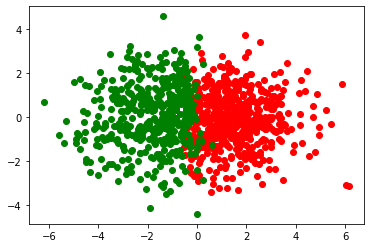

In [6]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
df = pd.read_csv(data_loc + 'two_classes.csv')

df_positive = df[df['y']==1]  
df_negative = df[df['y']==0]   
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

레이블이 1인 데이터는 빨간색, 레이블이 0인 데이터는 녹색으로 시각화한 모습이다. 데이터의 분포를 살펴보면 레이블 y가 0인 데이터는 음수 축에, 레이블이 1인 데이터는 양수 축에 주로 분포하는 것을 볼 수 있다.

<br>

SVM에서 사용하는 표준적인 손실함수는 경첩 손실함수이다. 이를 이용해 파이브라인을 만들고 학습시킨다.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X = df[['x1', 'x2']].to_numpy()  
y = df['y']  
svm = Pipeline([('scaler', StandardScaler()),('linearSVC', LinearSVC(C=1, loss='hinge'))])
svm.fit(X, y)

svm.predict([[0.12, 0.56], [-4, 40], [0, 40], [5,20]])

array([1, 0, 0, 1])

<br><br>

---

<br><br>

## 6. 결정 트리와 분류

<br><br>

결정 트리는 분류와 회귀작업, 다중 출력 등 여러 기능을 제공한다. 결정 트리는 스무고개를 하듯 예/아니오 질문을 이어가며 학습하는 알고리즘이다.
<br>

데이터들을 트리 구조의 루트에서 시작하여 중간 노드들을 거쳐 단말 노드까지 배정하는 기능을 수행한다.<br>

해당 단계를 무한정으로 깊게 하는 것보다는 가능한 얕은 단계에서 데이터가 분리될 수 있도록 하는 것이 좋다. 단계를 깊게 하면 해당 데이터에서는 잘 동작하지만, 새로운 데이터에는 잘 적용되지 않는 과적합이 발생할 수 있기 때문이다. 따라서 데이터 분리를 잘 하는 좋은 특성을 찾아내어 해당 특성 내에서 어떤 값을 기준으로 분리할지 결정하는 것이 좋다.

<br><br>

---

<br><br>

## 7. 엔트로피 계산

<br><br>

결정 트리의 루트 노드, 즉 중요한 속성을 판단하기 위해 정보 이득이라는 개념이 사용된다. 정보이득은 특정한 속성이 원하는 분류 방식에 부합하게 데이터를 나누는지를 측정하는 척도이다.

<br>

엔트로피는 정보량을 측정하기 위해 고안된 것으로, 값일 클수록 많은 정보가 담겨있다는 뜻이다.

<br><br>

---

<br><br>

## 8. 엔트로피 곡면과 정보 이득

<br><br>

정보 이득이란, 데이터를 나누었을 때 줄어들은 엔트로피이다. 엔트로피가 많이 줄어들었을수록, 정보 이득이 많아진다. 이를 최대화하여 분할하는 것이 ID3 알고리즘이다.

<br>

순도 혹은 불순도의 개념으로 설명할 수도 있다.<br>

CART 알고리즘은 불순도 개념을 사용하여 좋은 기준을 찾는 것이다. 그리고 이 불순도를 측정하는 일반적인 방법이 지니 불순도이다.<br>

불순도와 엔트로피는 비슷한 정보를 제공한다. 하지만 로그 함수를 사용하는 엔트로피보다 더 간단하게 불순도를 측정할 수 있기 때문에, CART 알고리즘이 엔트로피를 사용하는 ID3 알고리즘보다 더 효율적으로 구현 가능하다.

<br><br>

---

<br><br>

## 9. 불순도를 이용한 의사결정 트리 - CART 알고리즘

<br><br>

지니 불순도를 이용하여 결정 트리를 만드는 방법이 CART 알고리즘이다. 이 알고리즘은 현재 데이터가 섞여 있는 노드를 두 개의 노드로 나눌 때 어떤 속성 A와 해당 속성에 어떤 값 a를 기준으로 쪼갤 것인지를 찾는 문제이다.

<br><br>

---

<br><br>

## 10. 결정 트리 구현

<br><br>

사이킷런에서는 결정 트리를 손쉽게 활용할 수 있는 방법을 제공한다. 붓꽃 데이터를 이용하여 결정 트리를 만든다.

dec_tree_for_iris.dot  sample_data


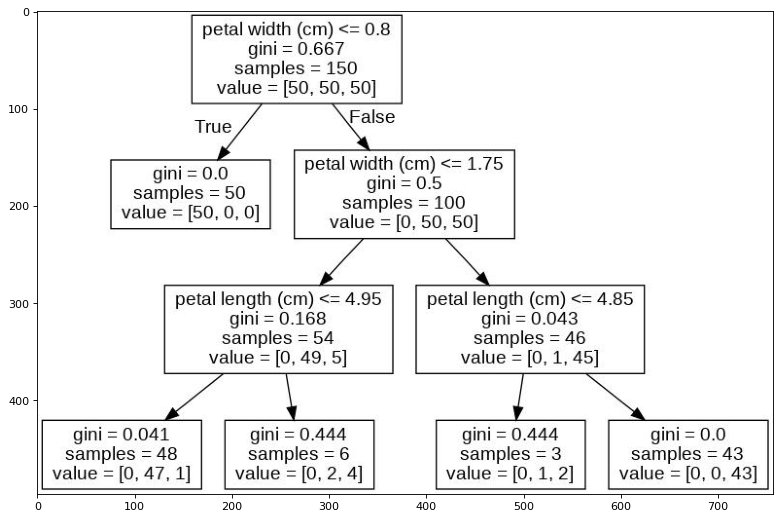

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

from sklearn.tree import export_graphviz
export_graphviz(dec_tree,out_file=("./dec_tree_for_iris.dot"),feature_names=iris.feature_names,)

!ls
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

각 노드의 최상단에 나타난 분할 조건이 노드를 쪼개는 기준이다. 단말 노드는 더 이상 쪼개지지 않기 때문에 분할 조건이 없다. 다음 줄에 나타나는 것이 해당 노드의 지니 불순도이다.

<br><br>

---

<br><br>

## 11. 차원

<br><br>

차원이란 데이터들을 식별하는 데 필요한 값을 개수이며, 각 데이터를 표현하는 특징의 종류이다.<br>

데이터를 다루기 위한 차원이 높아지면 대부분의 점들이 경계선에 놓이게 되고, 데이터들 사이의 거리가 멀어져서 공간 내 데이터의 밀도가 낮아지며 데이터들 사이의 관계를 파악하는 것이 힘들어진다.

<br><br>

---

<br><br>

## 12. 차원 축소

<br><br>

데이터들 사이의 관계를 파악하기 힘들어지는 것을 피하는 방법은 데이터를 표현하기 위한 특징의 수를 줄이는 것이다. 즉, 데이터를 더 낮은 차원에서 표현하면 된다. 이를 차원 축소라고 한다.<br>

차원을 축소하기 위해서는 관련성이 낮고 중복되거나 불필요한 정보를 담은 차원을 버리고 중요한 차원만 선택하는 것이 가장 단순한 차원 축소이다. 이를 특징 선택이라고 한다.<br>

데이터를 낮은 차원에 떨어뜨리는 것을 투영이라고 하는데, 원본 데이터의 분산을 최대로 유지하는 방향으로 투영이 일어나게 하는 것이 특징 투영의 목표이다.

<br>

차원 축소 문제에서 가장 일반적으로 사용되는 것은 주성분 분석이다. 데이터의 분산을 가장 잘 유지하는 축들을 주성분이라고 한다. 주성분은 여러 개의 축으로 구성되는데 첫 번째 주성분은 데이터의 분산을 가장 잘 표현하는 방향 벡터이고, 두 번째 주성분은 첫 번째 주성분과 직교하는 축들 가운데 데이터의 분산을 가장 잘 보존하는 축, 즉 방향벡터이다.

<br><br>

---

<br><br>

## 13. 3차원 공간의 데이터에서 주성분 찾기

<br><br>

3차원 공간에 특정 식을 축으로 하는 2차원 부분 공간에 약간의 잡음을 더한 데이터를 생성한다. 이 데이터에 주성분 분석을 한 뒤 찾은 주성분이 잡음을 생성한 축과 일치하는지 확인한다.

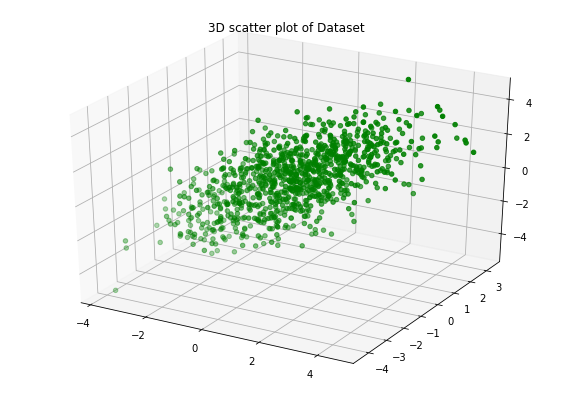

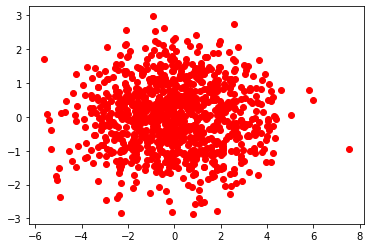

In [12]:
import numpy as np  
import matplotlib.pyplot as plt

u = np.array([1,1,1]) / np.sqrt(3)
v = np.array([1,0,-1]) / np.sqrt(2)

n_data = 1000
X = []
for _ in range(n_data) :
    r_coeff = np.random.randn(2,)
    data = 2.0* r_coeff[0] * u + r_coeff[1] * v + 0.1 * np.random.rand(3,)
    X.append(data)
X = np.array(X)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = "green")
plt.title("3D scatter plot of Dataset")
plt.show()

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_2d_sklearn = pca.fit_transform(X)
plt.scatter(X_2d_sklearn[:, 0], X_2d_sklearn[:, 1], color='r')
plt.show()

<br><br>

---

<br><br>

## 14. 4차원 공간에 존재하는 붓꽃 데이터를 2차원에서 분류

<br><br>

붓꽃 데이터는 네 개의 특징으로 표현되는 데이터이다. 따라서 하나의 데이터가 4차원 공간에 존재함을 의마한다. 4차원 데이터는 가시화하기 힘드니 이 데이터를 2차원 공간에 옮겨서 가시화한다.

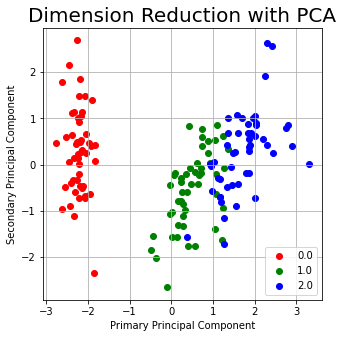

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

from sklearn.preprocessing import StandardScaler
features = iris['feature_names']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result  = pca.fit_transform(x)
principalDf = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Primary Principal Component')
ax.set_ylabel('Secondary Principal Component')
ax.set_title('Dimension Reduction with PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    idx = finalDf['target'] == target
    ax.scatter(finalDf.loc[idx, 'PC1'] , finalDf.loc[idx, 'PC2']
               , c = color)
ax.legend(targets)
ax.grid()

<br><br>

---

<br><br>

## 심화문제

<br><br>

### 1. 이 장에서 다룬 SVM 기법은 데이터를 직선(혹은 초평면)으로 분류할 수 밖에 없다. 하지만 실제 만나는 데이터들은 비선형 경계를 가지는 경우가 빈번하다. 이러한 데이터에 SVM을 적용하기 위해 어떤 방법을 사용할 수 있는지 생각해보라.

> 비선형 데이터셋을 다루는 방법으로는, 다항 특성과 같은 특성을 더 추가하는 방법이 있다. 특성을 추가하면 선형적으로 구분되는 데이터셋이 만들어질 수 있다.(다항식 커널, 유사도 특성, 가우시안 RBF 커널 등등)

<br><br>

### 2. 결정 트리에서 과적합과 과소적합은 어떠한 방식으로 나타나게 되는지 고민해보라. 그리고 이를 막기 위한 방법은 어떤 것이 있는지 생각해보라. 일반적으로 모델의 규제와 데이터의 추가 등이 사용되는데, 이것이 결정 트리에는 어떤 형식으로 적용되는지 생각해보라.

> 결정 트리에서 과적합은 학습데이터에 대해 과하게 학습하였기에 실제 데이터에 대한 오차가 증가한 것이다. 이를 예방하기 위해서는, 가지치기를 활용할 수 있다. 분기가 너무 많아 과적합이 일어난 경우, 적절한 수준에서 터미널 노드를 결합해주어서 과적합을 방지한다.

> 결정 트리에서 과소적합이 일어나는 이유는 깊이(depth)를 너무 적게 주어서 분류가 되지 않았기 때문이다. 이를 예방하기 위해서는 적절한 max_depth를 설정해야 한다.

<br><br>

### 3. 4차원으로 표현되는 붓꽃 데이터에 대해 결정 트리를 만들어 보았는데, 이 데이터에 대해 차원 축소를 적용하여 2차원으로 옮겨보았다. 이렇게 차원이 축소된 데이터에 대해 2단계의 결정 트리를 적용해 출력해보아라. 두 개의 차원만 사용하고 특징도 두 개만을 사용했는데 분류된 노드들의 순도가 어느 정도인지 확인해보라.

dec_tree_for_iris.dot  dec_tree_for_iris.jpg  sample_data


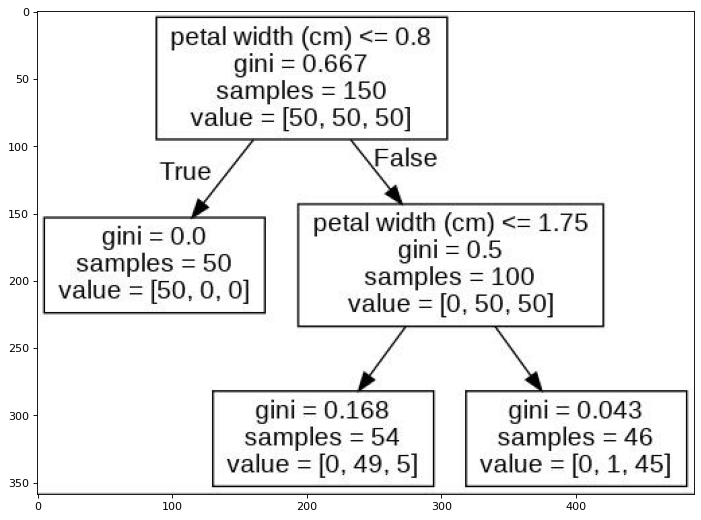

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=2)
dec_tree.fit(X, y)

from sklearn.tree import export_graphviz
export_graphviz(dec_tree,out_file=("./dec_tree_for_iris.dot"),feature_names=iris.feature_names,)

!ls
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

<br><br>

### 4. 주성분 분석 역시 데이터를 다룰 때, SVM처럼 선형모델만을 사용한다. 즉, 주성분으로 얻는 축은 원래의 데이터 공간에서 직선으로 표현되는 축이다. 이 축이 휘어질 수 있다면 데이터의 분산을 더 잘 유지하는 공간을 찾을 수 있지 않을까? 이를 구현하는 방법에 대한 아이디어를 제안해보라.

>

<br><br>

### 5. 커널 트릭 기법에 대해 조사해보라.

> 커널 트릭이란, 저차원 공간을 고차원 공간으로 매핑해주는 작업이다. 이를 활용하여 먼저 고차원 공간에서의 선형적인 값을 구한 뒤, 저차원 공간에서의 비선형적인 값을 구할 수 있다.